In [59]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Performance Metrics

In this lecture, we are going to study several metrics used to evaluate the performance of our machine learning model.

It should be said that a perfect machine learning model does not exist. There will always be some errors in the model, caused by any of the reasons listed below. 

### Bayes error：

In statistical classification, the [Bayes error rate](http://www.shivani-agarwal.net/Teaching/CIS-520/Spring-2018/Lectures/Reading/intro.pdf) ([Japanese link](https://www.slideshare.net/shuheisowa/ss-61091234)) is the lowest possible error rate for any classifier of a random outcome and is analogous to the irreducible error 【1】.

Take for example a [binary classifier](https://en.wikipedia.org/wiki/Binary_classification) for gender:
- Suppose, in a sample group, 90% of women have long hair, and 20% of men have long hair, where there are the same number of men and women. Thus, if a gender classifier relies only on whether the length of hair as its input, the Bayes error rate of a the best such classifier would be 15% or 0.15 (it would misclassify all long-haired men and short-haired women).

---

In [2]:
from sklearn import svm
N=10000
# 0 is female, 1 is male, using 50/50 ratio
gender = (np.random.random(N)>0.5).astype(np.int8)
# 0 is long hair, 1 is short hair. 
hair = (np.random.random(N)>gender*0.2+(1-gender)*0.9).astype(np.int8)

# a linear model is equivalent to the best possible model for this data
model = svm.LinearSVC()
model.fit(hair[...,None], gender)
predictions = model.predict(hair[...,None])
errors = predictions-gender
error_rate = (errors**2).sum()/N

print()
print('Ideal model error rate of: {:<5.2}'.format(error_rate))
print('Theoretical value of 0.15')
print()


Ideal model error rate of: 0.15 
Theoretical value of 0.15



---

### Other sources of error：

For any activity, we are eventually limited by resources: since increasing data, model training, model size all incur some cost, there is necessarily a point at which it is no longer viable to increase it further. This cost may be in the form of money, time, human suffering, computational power, etc.

---

## Metrics

Now, let's see some basic metrics with which to determine the performance of our models. 


### Accuracy or Error:

Accuracy is the proportion of examples for which the model produces the correct input. 

$Accuracy = \frac{n_{correct}}{n_{all}}$

The error rate is the proportion of examples for which the model produces the incorrect input. 

$Error = 1-Accuracy$

Both accuracy and error are commonly used for classification problems because of their easy human understandability.

---

In [3]:
# Let's continue with our male/female classifier used above.

accuracy = (predictions==gender).sum()/N
print()
print('This model achieves an accuracy of {:<5.2}'.format(accuracy))
print('This implies an error rate of {:<5.2}'.format(1-accuracy))
print()


This model achieves an accuracy of 0.85 
This implies an error rate of 0.15 



--- 

### Precision and Recall:

Precision and Recall are two metrics often used to evaluate classifiers. 

1. Precision (p) is the fraction of detections reported by the model that were correct. In other words, it is measures of the reliability of the model's detections--if it says an event happened, how likely is it to be correct?

$Precision = \frac{TruePositives}{TruePositives+FalsePositives}$ 

---

In [4]:
# Let's say that we our objective is to detect women specifically.

true_positives = ((predictions==0)&(gender==0)).sum()
false_positives = ((predictions==0)&(gender!=0)).sum()
precision = true_positives/(true_positives+false_positives)
print()
print('For detecting women, this model achieves a precision of {:<5.2}'.format(precision))
print('True value = 0.8182')
print()


For detecting women, this model achieves a precision of 0.82 
True value = 0.8182



---

2. Recall (r) is the fraction of true events that were detected. In other words, it measures what fractions of the events the model detects (and how many it misses)--what portion of events can we expect to catch?

$Recall = \frac{TruePositives}{TruePositives+FalseNegatives}$

---

In [5]:
false_negatives = ((predictions!=0)&(gender==0)).sum()
recall = true_positives/(true_positives+false_negatives)
print()
print('For detecting women, this model achieves a recall of {:<5.2}'.format(recall))
print('True value = 0.9')
print()


For detecting women, this model achieves a recall of 0.9  
True value = 0.9



---

A detector that says *no one has the disease* would achieve perfect precision but zero recall. The detector says *everyone has the disease* would achieve perfect recall, but the precision qual to the percentage of people who have the disease. (If we assume there is 2 people who have disease over 100 people group, so the precision would be 2%). 

In binary classifier, our model gives each instant a score, and the score is higher if the model believes the event we are detecting to have likely occurred. We choose to report a detection whenever this score **exceeds some threshold**. By changing the threshold, we change the precision and recall of the model. By varying this threshold, we can plot the [**PR curve**](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/) ([Japanese link](https://aidemy.net/courses/2010/exercises/HyGxFhIiUxG), traditionally with the precision on the y-axis and recall on the x-axis.

We can evaluate our PR curve by measuring the total area lying beneath the PR curve. The larger the area, the better.
    
In this example, three different classifiers are given, indexed 0, 1 and 2, which correspond to a good, medium, and poor performance classifier. We can run each of them by using the code below, and see how the PR curve changes.

There is a simple way of improving classifier 2--do you see it?

---

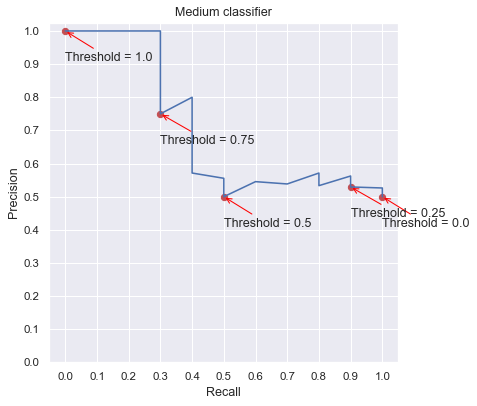

In [45]:
from implements_03.scripts_03 import PR

# assuming the models to be black-box functions

# select which model: 0, 1 or 2
model_index = 1

fig1 = plt.figure(num='fig111111', figsize=(6, 6), dpi=75, facecolor='#FFFFFF', edgecolor='#0000FF')

#Run the "PR" function
precisions = []
recalls = []
thresholds = []
#Threshold increase from 0 to 1 with step 0.01
for threshold_value in np.linspace(0,1,101):
    #Get the value of precision and recall for each value of threshold
    precision, recall = PR(threshold_value, model_index)
    #Record the data of precision and recall
    precisions.append(precision)
    recalls.append(recall)
    thresholds.append(threshold_value)
    if threshold_value%0.25==0:
        plt.plot(recall, precision, 'ro')
        plt.annotate('Threshold = '+str(threshold_value), (recall, precision), (0,-30), textcoords='offset pixels', arrowprops={'arrowstyle' :'->', 'color': 'red'})   
    
#Plot the PR Curve 
plt.plot(recalls, precisions)
plt.xticks(np.linspace(0,1,11,endpoint=True))
plt.yticks(np.linspace(0,1,11,endpoint=True))
plt.title({0: 'Good', 1: 'Medium', 2: 'Poor'}[model_index]+' classifier')
plt.ylabel('Precision')
plt.xlabel('Recall')


plt.show()

---

If we want to summarize the performance of the classifier with a single number rather than a curve, the F-score will be used and given by:
    $F=2pr/(p+r)$
    
---

---

### Coverage

Coverage is the fraction of example for which the machine learning system is able to produce a response. The Street View transcription systems provides an example of this situation. Where the system can always obtained 100% accuracy by refusing to process any example, but this reduced the coverage to 0%.

For the treet View task, the goal fot the project is to reach human-level transcription accuracy while maintaining 95% coverage. (By the way, human-level performance on this task is 98% accuracy.)

### Other metrics

There can be many other metrics depending on your particular application. Examples include [click-through rate](https://en.wikipedia.org/wiki/Click-through_rate), user satisfaction, and so on. 

---

## Loss functions：

Loss is one of the important metric for supervised training of ML models. It is calculated by a user-defined loss function. In general speaking, a lower loss means a better performance, and this function should be designed as such. 

### Mean squared error

The most common loss function for regressive models, this function penalizes the squared difference between the prediction and the true value.

$ MSE = \sum_i{(y_i-f(x_i))^2}$

This function has many desirable properties. It is symmetric around the true value, penalizing positive and negative errors equally. 
It penalizes large errors much more than small errors. It is convex (this is relevant for optimization algorithms such as gradient descent).
It is also a emerges naturally if we assume a gaussian distribution of errors and use maximum likelihood estimation (further explained in topic 7).

---

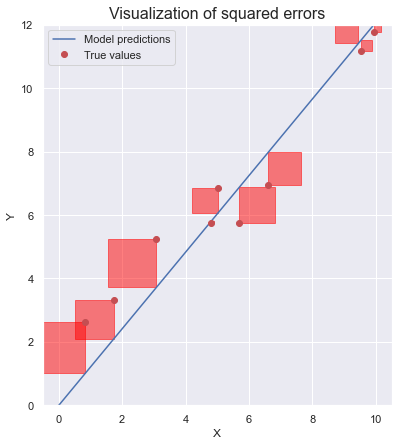

In [107]:
from sklearn import linear_model

X = np.random.random(10)*10
Y = X+np.random.random(*X.shape)*3

model = linear_model.LinearRegression(fit_intercept=False)
model.fit(X[...,None], Y[...,None])

P = model.predict(X[...,None])[...,0]

predictions = model.predict(np.linspace(0,10,20)[...,None])[...,0]

plt.plot(np.linspace(0,10,20), predictions, label='Model predictions')
plt.plot(X, Y, 'ro', label='True values')
patches = []

for x, y, p in zip(X, Y, P):
    
    patches.append(mpl.patches.Polygon(np.asarray([[x, p], 
                                                    [x, y], 
                                                    [x-y+p, y],
                                                    [x-y+p, p]])))
patch_collection = mpl.collections.PatchCollection(patches, color='red', alpha=0.5)

plt.title('Visualization of squared errors', fontdict={'fontsize':16})
plt.ylabel('Y')
plt.xlabel('X')
plt.gca().set_aspect('equal')
plt.ylim(0,12)
plt.gcf().set_size_inches(7,7)
plt.gca().add_collection(patch_collection)

plt.legend()

plt.show()

---

### Categorical crossentropy

While MSE is the most commonly used loss for regressors, classifiers are typically evaluated using [categorical crossentropy](https://rdipietro.github.io/friendly-intro-to-cross-entropy-loss/).
For a great and intuitive explanation of the mathematics behind this function, please refer to the link above.

$ H = -\sum_i{y_i*\log{f(x_i)}}$

where y are the labels and f(x)the predictions.

This error function is also a natural result of utilizing maximum likelihood estimation.

---

---

### Multiple losses

In the real project, there are always more than one error we have to reduce. But not all of them have the same weight or priority.

For example, suppose we want to build a Junk mail classifier. In general, the cost of blocking legitimate (or good) mail or massages is higher than the cost of allowing spam( or bad) mail or massages. We therefore want to penalize false positives higher than false negatives. 

---

# Reference:
1. Fukunaga, Keinosuke (1990) Introduction to Statistical Pattern Recognition by ISBN 0122698517 pages 3 and 97

2. Jump up to:a b K. Tumer, K. (1996) "Estimating the Bayes error rate through classifier combining" in Proceedings of the 13th International Conference on Pattern Recognition, Volume 2, 695–699

3. En.wikipedia.org. 2020. Bayes Error Rate. [online] Available at: <https://en.wikipedia.org/wiki/Bayes_error_rate> [Accessed 13 May 2020].

4. Goodfellow, I., Bengio, Y. and Courville, A., 2016. Deep learning. MIT press.